In [1]:
import pandas as pd

In [2]:
# There are two datasets available, but we'll just work with the larger, white
# wine dataset. Feel free to play around with the red wine dataset once you've
# finished the lab
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

In [5]:
print(type(all_data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# It's a single function call to load a dataset. CSV files typically use commas
# as delimiters between records, but our dataset uses semicolons so we had to
# specify it with the "delimiter" argument.
all_data = pd.read_csv(white_wine_url, delimiter=';')


In [6]:
all_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
all_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
all_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

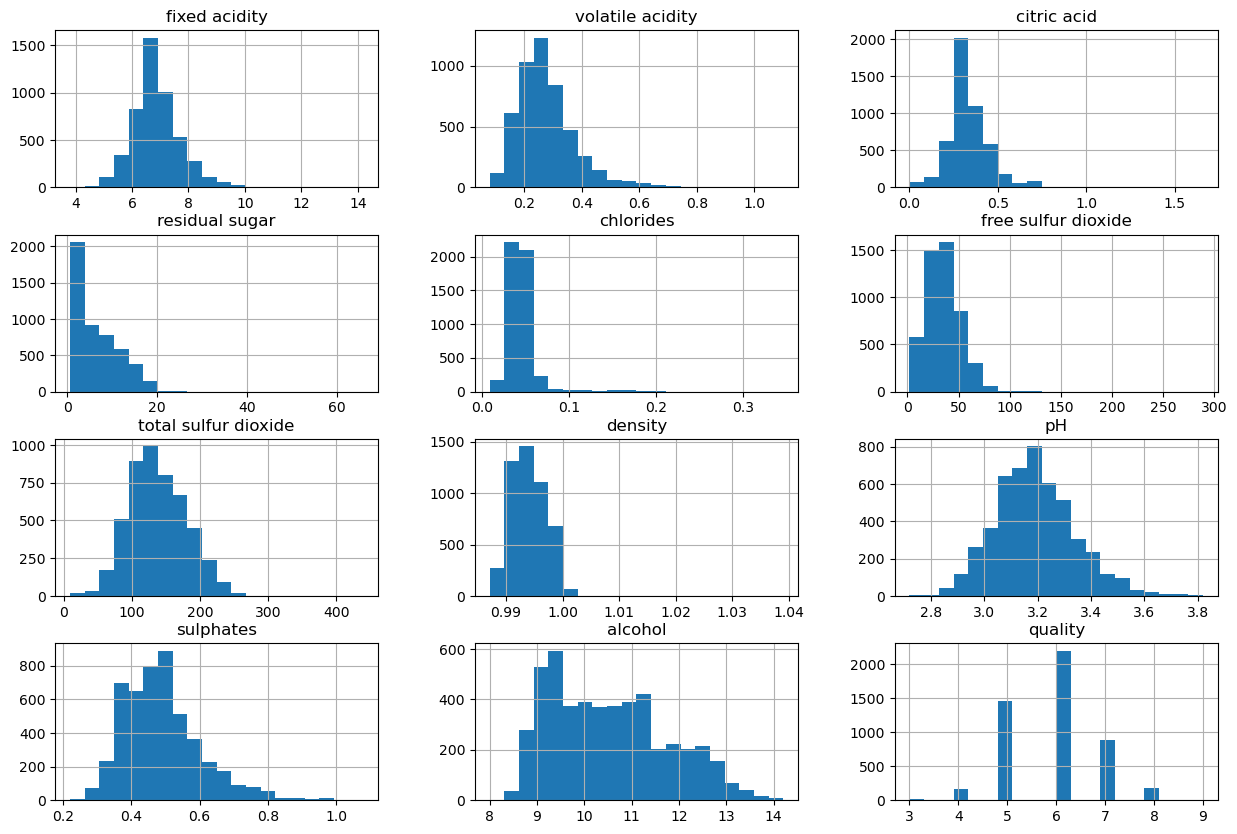

In [7]:
all_data.hist(bins=20, figsize=(15, 10))

In [8]:
target_column = "quality"

# TODO: Extract just the *input* features. Instead of specifying all of the features we
# want, we should drop the feature we *don't* want.
x_data = all_data.drop(target_column, axis=1)


# TODO: Extract the target feature. We don't want a Series here, but a DataFrame
# with one column (see the above cell)
y_data = all_data[[target_column]]

In [9]:
x_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [10]:
# If your implementation is correct the shape of y_data should be (4898, 1)
# So y_data is a 2D tensor containing 4898 examples and just 1 feature.
print("y_data shape:", y_data.shape) 

y_data shape: (4898, 1)


In [11]:
# Just like with tensors, we can print the shape
num_examples = x_data.shape[0]
num_input_features = x_data.shape[1]

In [12]:
# If your implementation is correct the number of samples should be 4898
print("Number of examples:", num_examples) 

# If your implementation is correct the number of input features should be 11
print("Number of input features:", num_input_features)

Number of examples: 4898
Number of input features: 11


In [13]:
# If your implementation the shape of the x_data tensor should be (4898, 11)
# which means it is a 2D array where each row represents one example and each
# column represents one feature
print("x_data shape:", x_data.shape )

x_data shape: (4898, 11)


In [33]:
# import torch and the dataset utilities we need
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split

In [35]:
# The percentages for each partition
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.1
TEST_SPLIT = 0.1

In [36]:
# Ensure that the splits add to 100%
assert TRAIN_SPLIT + VAL_SPLIT + TEST_SPLIT == 1

In [37]:
# TODO: Create two tensors and initialise them with x_data.values and y_data.values.
# The dtype should be torch.float32. DataFrame.values directly returns the 2D
# data in the dataframe, which is what Torch requires to initialise a tensor.
# we have done the initialization for x_tensor for you. Please do something similar
# the y_tensor.

x_tensor = torch.tensor(x_data.values, dtype=torch.float32)
y_tensor = torch.tensor(y_data.values, dtype=torch.float32)

In [38]:
assert torch.is_tensor(x_tensor) and x_tensor.dtype == torch.float32
assert torch.is_tensor(y_tensor) and y_tensor.dtype == torch.float32

In [39]:
# Now we construct a TensorDataset - a simple class used to associate each x and
# y value in our tensors.
full_dataset = TensorDataset(x_tensor, y_tensor)

In [40]:
# Calculate the number of examples in each partition
train_size = int(TRAIN_SPLIT * len(all_data))
val_size = int(VAL_SPLIT * len(all_data))
test_size = len(all_data) - train_size - val_size

In [41]:
print("Train examples:     ", train_size)
print("Validation examples:", val_size)
print("Test examples:      ", test_size)

Train examples:      3918
Validation examples: 489
Test examples:       491


In [42]:
# # Before we actually split the dataset, we seed Torch's random number generator.
# This ensure that we end up with the exact same partitions every time it's run.
torch.manual_seed(42)

In [43]:
# TODO: Split the dataset using the random_split function we imported earlier.
# The function takes a dataset and a list of partition lengths.
# Hint: We already have all of these variables available
#       You can see an example here:
#       https://www.programcreek.com/python/example/125046/torch.utils.data.random_split
train_dataset, val_dataset, test_dataset = random_split(full_dataset,
                                                       [train_size, val_size, test_size])

In [44]:
# To find number of data in each dataset
print("train set size: ", len(train_dataset))
print("validation set size: ", len(val_dataset))
print("test set size: ", len(test_dataset))

train set size:  3918
validation set size:  489
test set size:  491


In [45]:
BATCH_SIZE = 64

In [46]:
# TODO: Construct a DataLoader for each Dataset. The constructor takes three
# arguments - a Dataset, the batch size, and a boolean indicating whether it
# should shuffled. We will set shuffle=True for train dataloader and 
# shuffle=False for the other two. We have written the train_loader for you
# you should write the rest.

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [47]:
for batch in train_loader:
    inputs, labels = batch
    print(inputs.shape, labels.shape)
    break

torch.Size([64, 11]) torch.Size([64, 1])


In [48]:
# GPU
device = torch.device("cpu")

# Check if GPU acceleration is available (requires a CUDA-compatible GPU) and
# set the device variable accordingly. If the computer has more than one GPU,
# you can specify which one by replacing 0 with a different index
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)

print("Training on", device)

Training on cpu


In [49]:
# import the neural network module of pytorch. we access its methods like nn.Linear
import torch.nn as nn

In [ ]:
# Our model class must subclass nn.Module
class MLP(nn.Module):
    
    def __init__(self, device):
        super().__init__()
        